# Retraining models

In this section we learn how to retrain our models with Keras. We start with a simple example using linear regression and go next to a more complex example of a VGG network. The retraining is about updating our current model with new datasets and train it again. It's crucial to use the same weight that we base on while retraining the model. The figure below gives a general overview of how it works, where the old weight matrix comes from our previous training. The goal of the retraining is to get a better accuracy and generalize better.


## Simple retrain

We use linear regression and build a model to use it later for retraining.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD


DOMAIN = np.linspace(0, 20, 40)
UPDATES = [
    (2, 0),
    (2.2, 0.75)
]

def func(level):
    return UPDATES[level][0] * DOMAIN + UPDATES[level][1] + (1 + level) * np.random.randn(DOMAIN.shape[0])

X_1 = DOMAIN
X_2 = DOMAIN
X_FULL = np.concatenate([X_1, X_2])

Y_1 = func(0)
Y_2 = func(1)
Y_FULL = np.concatenate([Y_1, Y_2])


def create_model():
    # This is equivalent to linear regression model
    model = Sequential()
    model.add(Dense(units=1, activation='linear', input_dim=1))
    optimizer = SGD(lr=0.001)
    model.compile(loss='mse', optimizer=optimizer)
    return model


def get_coefficients(model):
    a, b = model.layers[0].get_weights()
    return a, b 

In [12]:
print(func(0))

[ 0.99773654  1.24932513  0.21503051  3.30115574  4.26670311  4.24251472
  7.43188161  6.4694828   9.858227   10.83249936 11.05254488 12.53795006
 13.91032472 13.21747229 13.90872635 14.54695844 16.11316904 17.49768872
 18.11419354 20.93431595 19.92732892 22.02433391 23.01100413 23.08551814
 23.53189122 26.90669986 26.58032572 27.89739769 27.6869462  26.88941167
 30.29745599 31.11954592 33.2975642  33.5129487  32.68066888 35.968079
 37.58648149 37.27696757 39.72321155 40.3499116 ]


Let's visualize our dataset

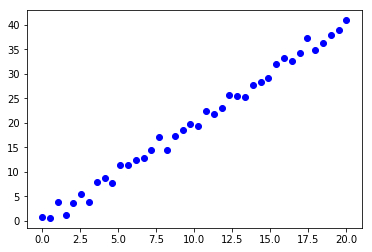

In [2]:
plt.scatter(X_1, Y_1, c='b')

Train the model. Check what loss we have at the end.

In [3]:
model = create_model()
model.fit(X_1, Y_1, epochs=5)

Epoch 1/5
40/40 [==============================] - 0s 12ms/step - loss: 1469.7293
Epoch 2/5
40/40 [==============================] - 0s 145us/step - loss: 365.1695
Epoch 3/5
40/40 [==============================] - 0s 234us/step - loss: 105.0489
Epoch 4/5
40/40 [==============================] - 0s 150us/step - loss: 29.8182
Epoch 5/5
40/40 [==============================] - 0s 874us/step - loss: 10.3691


Visualize dataset (blue) and learned function (red)

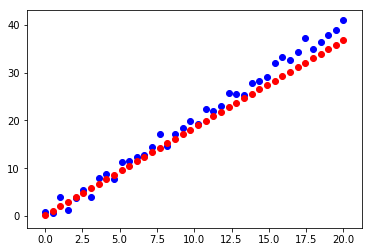

In [4]:
a, b = get_coefficients(model)
plt.scatter(X_1, Y_1, c='b')
plt.scatter(X_1, a * X_1 + b, c='r')

New data arrived. Let's check how it looks like.

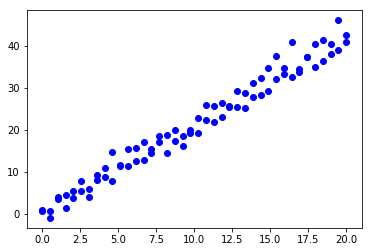

In [5]:
plt.scatter(X_FULL, Y_FULL, c='b')

Does our function fit?

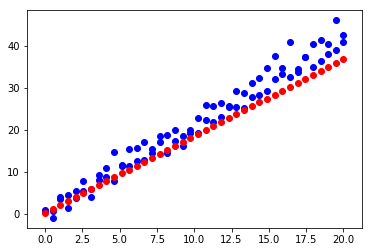

In [6]:
a, b = get_coefficients(model)
plt.scatter(X_FULL, Y_FULL, c='b')
plt.scatter(X_1, a * X_1 + b, c='r')

Let's evaluate our function on updated dataset. How the error changed?

In [7]:
model.evaluate(X_FULL, Y_FULL)

80/80 [==============================] - 0s 504us/step


14.570864295959472

### Exercise 1: Retrain linear regression model

Let's retrain the model! Remember to use only new data while retraining. New data is available at `X_2` and `Y_2`

In [ ]:
# your code goes here

## Transfer learning and retrain

In this part we take a more complex modelof VGG and retrain it. We use import required libraries.

In [ ]:
import numpy as np
import scipy.misc as misc

from keras.applications import VGG16
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Model, Sequential
from keras.optimizers import RMSprop
from keras.utils import to_categorical

We need to setup a few parameters and get the CIFAR10 dataset.

In [ ]:
IMG_SIZE = 48
CLASSES = 3
MAX_FEATURE = 255
FIRST_ROUND_SAMPLES = 10000

(_x_train, y_train), (_x_test, y_test) = cifar10.load_data()
y_train = y_train.squeeze()
y_test = y_test.squeeze()

train_idx = [y_train < CLASSES]
test_idx = [y_test < CLASSES]

_x_train = _x_train[train_idx]
y_train = y_train[train_idx]
_x_test = _x_test[test_idx]
y_test = y_test[test_idx]

x_train = np.zeros((_x_train.shape[0], IMG_SIZE, IMG_SIZE, _x_train.shape[-1]))
for idx, img in enumerate(_x_train):
    x_train[idx, :, :, :] = misc.imresize(img, (IMG_SIZE, IMG_SIZE))
x_train /= MAX_FEATURE
y_train = to_categorical(y_train)

x_retrain = x_train[FIRST_ROUND_SAMPLES:]
x_train = x_train[:FIRST_ROUND_SAMPLES]
y_retrain = y_train[FIRST_ROUND_SAMPLES:]
y_train = y_train[:FIRST_ROUND_SAMPLES]

x_test = np.zeros((_x_test.shape[0], IMG_SIZE, IMG_SIZE, _x_test.shape[-1]))
for idx, img in enumerate(_x_test):
    x_test[idx, :, :, :] = misc.imresize(img, (IMG_SIZE, IMG_SIZE))
x_test /= MAX_FEATURE
y_test = to_categorical(y_test)

### Exercise 2: Retrain the VGG16 network.

Tasks:

1. Freeze convolutional layers. See documentation for details.
2. Add new classification layers on top of VGG.
3. Use `x_retrain` and `y_retrain` to update your model and improve its accuracy. You can try to change optimizer and see if it will help.

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))


for layer in vgg_model.layers:
    # trainable
    raise NotImplemented('You need to freeze VGG weights') ### 1

### 2
x = vgg_model.output
# Flatten
# Dense 256 relu
# Dropout
# Dense 128 relu
# Droupout
# Dense 3 softmax
raise NotImplemented('You need to create clasiffication on top of VGG')
predictions = ???
###

loss='categorical_crossentropy'

model_final = Model(input=vgg_model.input, output=predictions)
raise NotImplemented('You need to compile model, choose optimizer by yourself.')
# compile
# optimizer
model_final.fit(x_train, y_train, batch_size=32)

loss, accuracy = model_final.evaluate(x_test, y_test)
print(f'accuracy on test set: {accuracy * 100}%')

final_model.save('transfer_learning_keras_model.h5')

New data arrived! Fill the gap below.

In [ ]:
from keras.models import load_model

saved_model = load_model('transfer_learning_keras_model.h5')

## 3 
# fit
##

loss, accuracy = saved_model.evaluate(x_test, y_test)
print(f'accuracy on test set: {accuracy * 100}%')